<a href="https://colab.research.google.com/github/karencfisher/COVID19/blob/main/notebooks/image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

BASE_PATH = '/content/drive/MyDrive/COVID-19_Radiography_Dataset'
!unzip -q /content/drive/MyDrive/COVID-19_Radiography_Dataset/data_old.zip

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2


#### Get metadata on training set 

In [4]:
classes = ('normal', 'COVID')
data_path = 'data'

counts = []
filelists = []
for item in classes:
    filelist = os.listdir(os.path.join(data_path, 'train', item))
    filelists.append(filelist)
    counts.append(len(filelist))

images = []
labels = []
for i, item in enumerate(classes):
    image_files = random.sample(filelists[i], 3)
    for image_file in image_files:
        image_path = os.path.join(data_path, 'train', item, image_file)
        image = cv2.imread(image_path)
        images.append(image)
        labels.append(item)


In [18]:
def displayImages(images, labels):
  _, axes = plt.subplots(1, 6, figsize=(20,20))
  for i in range(len(images)):
    axes[i].imshow(images[i], cmap='gray')
    axes[i].set_title(labels[i])
    
  _, axes2 = plt.subplots(1, 6, sharey=True, figsize=(20,2))
  for i in range(len(images)):
    axes2[i].hist(images[i].ravel(),256,[0,256])
    axes2[i].set_ylim(200)


#### Original Images

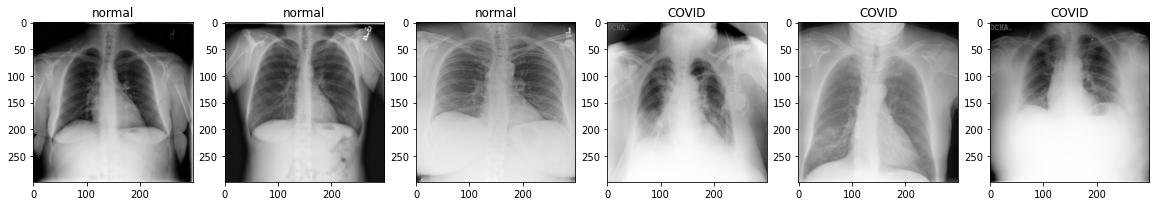

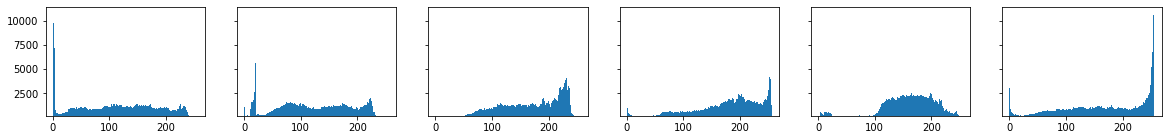

In [13]:
displayImages(images, labels)

### Unsharp Mask

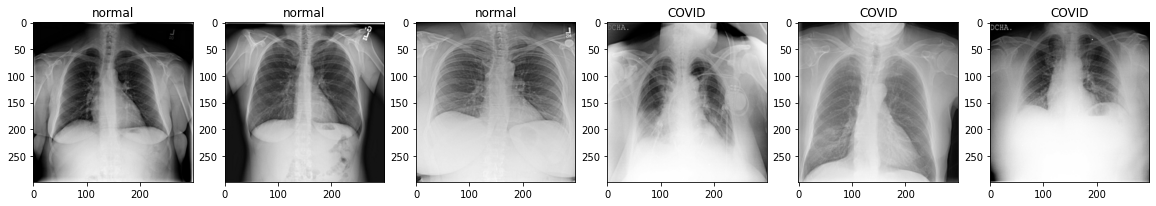

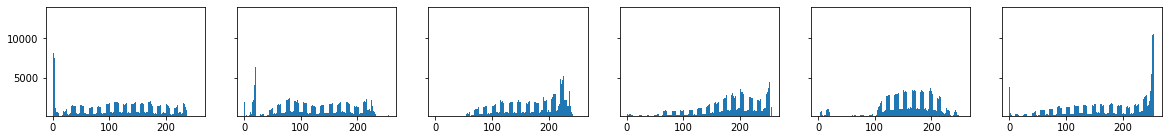

In [14]:
um_images = []
for i in range(len(images)):
  gaussian_3 = cv2.GaussianBlur(images[i], (0, 0), 2.0)
  unsharp_image = cv2.addWeighted(images[i], 1.5, gaussian_3, -0.5, 0)
  um_images.append(unsharp_image)
  
displayImages(um_images, labels)

#### Histogram Equalization

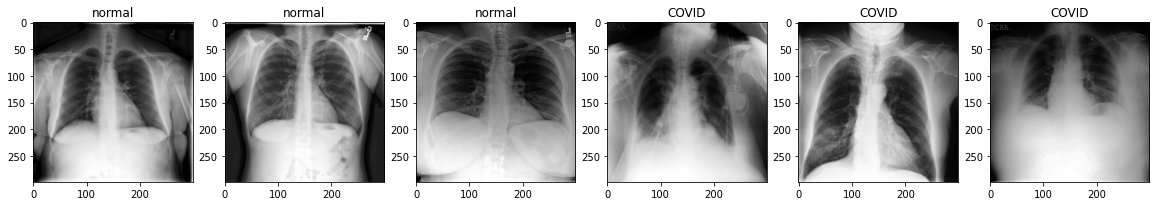

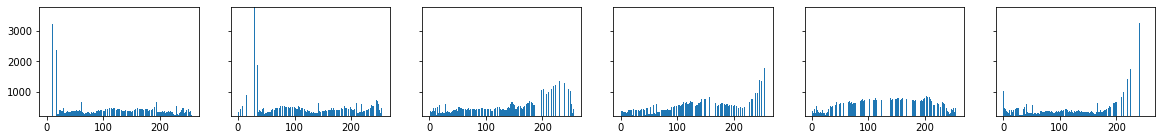

In [15]:
he_images = []
for i in range(len(images)):
  img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  equ = cv2.equalizeHist(img)
  he_images.append(equ)
displayImages(he_images, labels)

#### CLAHE (Contrast Limited Adaptive Histogram Equalization)

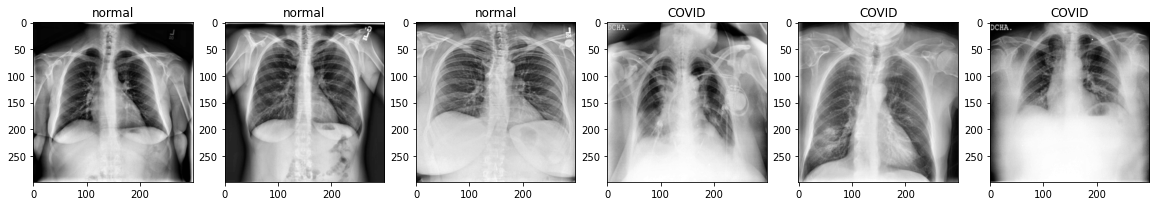

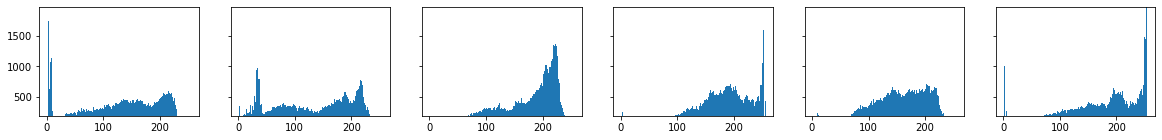

In [17]:
clahe_images = []
for i in range(len(images)):
  img = cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  img_clahe = clahe.apply(img)
  clahe_images.append(img_clahe)
displayImages(clahe_images, labels)
